In [3]:
!pip install tensorflow

In [1]:
from keras.models import Sequential,load_model
from keras.layers import ConvLSTM2D, Flatten, MaxPooling3D,TimeDistributed,Dropout, Conv2D,MaxPooling2D, LSTM, Reshape, Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [7]:
import cv2
import numpy as np
import json
import pathlib
import random
import matplotlib.pyplot as plt

subset_paths = {
  'train': pathlib.Path('./dataset/train'),
  'val': pathlib.Path('./dataset/val'),
  'test': pathlib.Path('./dataset/test')
}

HEIGHT = 224
WIDTH = 224
N_FRAMES = 20
num_classes = 64

In [3]:
def groupFrames(video_path, n_frames = N_FRAMES, frame_step = 15):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  encoded_string = video_path.encode('latin-1')
  video_path = encoded_string.decode("utf-8")
  src = cv2.VideoCapture(video_path)  
  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)
  print(f'Video url: {video_path}, video_length:{video_length}')
  need_length = 1 + (n_frames - 1) * frame_step
  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)
  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  if ret: 
      frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      frame = np.expand_dims(frame, axis=-1) 
      result.append(frame/255)
  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:   
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        frame = np.expand_dims(frame, axis=-1) 
        result.append(frame/255)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  cv2.destroyAllWindows()
  result = np.array(result)
  #print('SHAPE RESULT',result.shape)
  return result

def find_id(labels,name):
   return list(filter(lambda x: x['name'] == name,labels))[0]

def get_files_and_class_names(path):
    video_paths = list(path.glob('*/*.avi'))
    classes = [p.parent.name for p in video_paths]
    f = open('./dataset.json')
    labels = json.load(f)
    classes = np.array(list(map(lambda x: int(find_id(labels,x)['id'])-1,classes)))
    encoded_labels = to_categorical(classes)
    videos = np.array([groupFrames(str(p)) for p in video_paths],dtype='float16')
    return videos, classes

In [4]:
print('Preparando datos...')
x_train, y_train = get_files_and_class_names(subset_paths['train'])
X_val, y_val = get_files_and_class_names(subset_paths['val'])

Preparando datos...
Video url: dataset_full\train\Aceptar\050_001_001.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_001_002.avi, video_length:182.0
Video url: dataset_full\train\Aceptar\050_001_003.avi, video_length:152.0
Video url: dataset_full\train\Aceptar\050_002_001.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_002_002.avi, video_length:152.0
Video url: dataset_full\train\Aceptar\050_002_003.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_002_004.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_002_005.avi, video_length:152.0
Video url: dataset_full\train\Aceptar\050_003_001.avi, video_length:152.0
Video url: dataset_full\train\Aceptar\050_003_003.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_003_005.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_004_002.avi, video_length:122.0
Video url: dataset_full\train\Aceptar\050_004_004.avi, video_length:122.0
Video url: dataset

Video url: dataset_full\train\Amargo\019_009_005.avi, video_length:88.0
Video url: dataset_full\train\Amargo\019_010_002.avi, video_length:58.0
Video url: dataset_full\train\Amargo\019_010_003.avi, video_length:88.0
Video url: dataset_full\train\Amargo\019_010_004.avi, video_length:88.0
Video url: dataset_full\train\Amargo\019_010_005.avi, video_length:58.0
Video url: dataset_full\train\Amarillo\004_001_001.avi, video_length:88.0
Video url: dataset_full\train\Amarillo\004_001_002.avi, video_length:88.0
Video url: dataset_full\train\Amarillo\004_001_003.avi, video_length:88.0
Video url: dataset_full\train\Amarillo\004_002_003.avi, video_length:118.0
Video url: dataset_full\train\Amarillo\004_002_004.avi, video_length:88.0
Video url: dataset_full\train\Amarillo\004_002_005.avi, video_length:88.0
Video url: dataset_full\train\Amarillo\004_003_005.avi, video_length:88.0
Video url: dataset_full\train\Amarillo\004_004_001.avi, video_length:118.0
Video url: dataset_full\train\Amarillo\004_004

Video url: dataset_full\train\Aprender\016_006_003.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_006_005.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_007_001.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_007_002.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_007_003.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_007_004.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_007_005.avi, video_length:148.0
Video url: dataset_full\train\Aprender\016_008_001.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_008_003.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_009_001.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_009_003.avi, video_length:118.0
Video url: dataset_full\train\Aprender\016_009_004.avi, video_length:88.0
Video url: dataset_full\train\Aprender\016_009_005.avi, video_length:118.0
Video url: dataset_full\tr

Video url: dataset_full\train\Atrapar\055_003_003.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_003_004.avi, video_length:92.0
Video url: dataset_full\train\Atrapar\055_004_002.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_004_003.avi, video_length:92.0
Video url: dataset_full\train\Atrapar\055_004_004.avi, video_length:92.0
Video url: dataset_full\train\Atrapar\055_004_005.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_005_001.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_005_002.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_005_004.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_005_005.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_006_003.avi, video_length:122.0
Video url: dataset_full\train\Atrapar\055_006_005.avi, video_length:92.0
Video url: dataset_full\train\Atrapar\055_007_001.avi, video_length:92.0
Video url: dataset_full\train\Atrapar\055_0

Video url: dataset_full\train\Bailar\057_010_002.avi, video_length:92.0
Video url: dataset_full\train\Barco\037_001_003.avi, video_length:152.0
Video url: dataset_full\train\Barco\037_001_004.avi, video_length:152.0
Video url: dataset_full\train\Barco\037_001_005.avi, video_length:152.0
Video url: dataset_full\train\Barco\037_002_003.avi, video_length:122.0
Video url: dataset_full\train\Barco\037_002_005.avi, video_length:152.0
Video url: dataset_full\train\Barco\037_003_001.avi, video_length:152.0
Video url: dataset_full\train\Barco\037_003_002.avi, video_length:122.0
Video url: dataset_full\train\Barco\037_003_003.avi, video_length:122.0
Video url: dataset_full\train\Barco\037_003_004.avi, video_length:152.0
Video url: dataset_full\train\Barco\037_003_005.avi, video_length:122.0
Video url: dataset_full\train\Barco\037_004_002.avi, video_length:122.0
Video url: dataset_full\train\Barco\037_004_003.avi, video_length:122.0
Video url: dataset_full\train\Barco\037_004_005.avi, video_lengt

Video url: dataset_full\train\Burlarse de\029_006_005.avi, video_length:122.0
Video url: dataset_full\train\Burlarse de\029_007_002.avi, video_length:92.0
Video url: dataset_full\train\Burlarse de\029_007_003.avi, video_length:152.0
Video url: dataset_full\train\Burlarse de\029_007_004.avi, video_length:122.0
Video url: dataset_full\train\Burlarse de\029_008_002.avi, video_length:122.0
Video url: dataset_full\train\Burlarse de\029_009_002.avi, video_length:122.0
Video url: dataset_full\train\Burlarse de\029_009_003.avi, video_length:152.0
Video url: dataset_full\train\Burlarse de\029_009_005.avi, video_length:122.0
Video url: dataset_full\train\Burlarse de\029_010_002.avi, video_length:152.0
Video url: dataset_full\train\Burlarse de\029_010_003.avi, video_length:122.0
Video url: dataset_full\train\Burlarse de\029_010_004.avi, video_length:122.0
Video url: dataset_full\train\Cajón\014_001_001.avi, video_length:118.0
Video url: dataset_full\train\Cajón\014_001_002.avi, video_length:88.0


Video url: dataset_full\train\Colores\007_005_004.avi, video_length:118.0
Video url: dataset_full\train\Colores\007_005_005.avi, video_length:118.0
Video url: dataset_full\train\Colores\007_006_001.avi, video_length:118.0
Video url: dataset_full\train\Colores\007_006_002.avi, video_length:118.0
Video url: dataset_full\train\Colores\007_007_002.avi, video_length:88.0
Video url: dataset_full\train\Colores\007_008_001.avi, video_length:148.0
Video url: dataset_full\train\Colores\007_008_002.avi, video_length:88.0
Video url: dataset_full\train\Colores\007_008_003.avi, video_length:118.0
Video url: dataset_full\train\Colores\007_008_004.avi, video_length:118.0
Video url: dataset_full\train\Colores\007_009_001.avi, video_length:88.0
Video url: dataset_full\train\Colores\007_009_004.avi, video_length:88.0
Video url: dataset_full\train\Colores\007_010_001.avi, video_length:88.0
Video url: dataset_full\train\Colores\007_010_002.avi, video_length:88.0
Video url: dataset_full\train\Colores\007_01

Video url: dataset_full\train\Cumpleaños\030_003_001.avi, video_length:122.0
Video url: dataset_full\train\Cumpleaños\030_003_002.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_003_003.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_003_004.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_003_005.avi, video_length:122.0
Video url: dataset_full\train\Cumpleaños\030_004_001.avi, video_length:122.0
Video url: dataset_full\train\Cumpleaños\030_005_002.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_005_005.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_006_002.avi, video_length:182.0
Video url: dataset_full\train\Cumpleaños\030_006_003.avi, video_length:212.0
Video url: dataset_full\train\Cumpleaños\030_007_002.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_007_003.avi, video_length:152.0
Video url: dataset_full\train\Cumpleaños\030_007_004.avi, video_length:122.0

Video url: dataset_full\train\Desayuno\031_010_004.avi, video_length:152.0
Video url: dataset_full\train\Desayuno\031_010_005.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_001_001.avi, video_length:182.0
Video url: dataset_full\train\Dulce\046_001_002.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_001_005.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_002_001.avi, video_length:122.0
Video url: dataset_full\train\Dulce\046_002_003.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_002_004.avi, video_length:122.0
Video url: dataset_full\train\Dulce\046_002_005.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_003_003.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_003_004.avi, video_length:152.0
Video url: dataset_full\train\Dulce\046_004_002.avi, video_length:122.0
Video url: dataset_full\train\Dulce\046_004_003.avi, video_length:122.0
Video url: dataset_full\train\Dulce\046_005_001.avi, video

Video url: dataset_full\train\Enemigo\010_009_001.avi, video_length:118.0
Video url: dataset_full\train\Enemigo\010_009_002.avi, video_length:88.0
Video url: dataset_full\train\Enemigo\010_010_001.avi, video_length:88.0
Video url: dataset_full\train\Enemigo\010_010_002.avi, video_length:88.0
Video url: dataset_full\train\Enemigo\010_010_003.avi, video_length:88.0
Video url: dataset_full\train\Enemigo\010_010_005.avi, video_length:118.0
Video url: dataset_full\train\Espaguetis\048_001_002.avi, video_length:182.0
Video url: dataset_full\train\Espaguetis\048_001_004.avi, video_length:212.0
Video url: dataset_full\train\Espaguetis\048_002_001.avi, video_length:152.0
Video url: dataset_full\train\Espaguetis\048_002_004.avi, video_length:152.0
Video url: dataset_full\train\Espaguetis\048_003_001.avi, video_length:182.0
Video url: dataset_full\train\Espaguetis\048_003_004.avi, video_length:182.0
Video url: dataset_full\train\Espaguetis\048_003_005.avi, video_length:152.0
Video url: dataset_fu

Video url: dataset_full\train\Hambriento\033_005_002.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_005_005.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_006_004.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_006_005.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_007_001.avi, video_length:122.0
Video url: dataset_full\train\Hambriento\033_007_002.avi, video_length:122.0
Video url: dataset_full\train\Hambriento\033_007_005.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_008_001.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_008_003.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_008_005.avi, video_length:122.0
Video url: dataset_full\train\Hambriento\033_009_001.avi, video_length:122.0
Video url: dataset_full\train\Hambriento\033_010_001.avi, video_length:152.0
Video url: dataset_full\train\Hambriento\033_010_002.avi, video_length:122.0

Video url: dataset_full\train\Leche dulce\020_005_002.avi, video_length:118.0
Video url: dataset_full\train\Leche dulce\020_005_003.avi, video_length:118.0
Video url: dataset_full\train\Leche dulce\020_005_004.avi, video_length:118.0
Video url: dataset_full\train\Leche dulce\020_005_005.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_006_001.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_006_004.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_006_005.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_007_002.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_007_003.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_007_004.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_008_001.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_008_002.avi, video_length:88.0
Video url: dataset_full\train\Leche dulce\020_008_005.avi, video_length:8

Video url: dataset_full\train\Moneda\035_003_001.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_003_002.avi, video_length:152.0
Video url: dataset_full\train\Moneda\035_003_003.avi, video_length:152.0
Video url: dataset_full\train\Moneda\035_004_002.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_004_004.avi, video_length:152.0
Video url: dataset_full\train\Moneda\035_004_005.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_005_002.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_005_003.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_006_001.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_006_004.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_007_001.avi, video_length:122.0
Video url: dataset_full\train\Moneda\035_007_002.avi, video_length:152.0
Video url: dataset_full\train\Moneda\035_007_004.avi, video_length:152.0
Video url: dataset_full\train\Moneda\035_008_001.av

Video url: dataset_full\train\Nacido\015_010_004.avi, video_length:58.0
Video url: dataset_full\train\Nacido\015_010_005.avi, video_length:58.0
Video url: dataset_full\train\Ninguno\038_001_002.avi, video_length:152.0
Video url: dataset_full\train\Ninguno\038_001_003.avi, video_length:122.0
Video url: dataset_full\train\Ninguno\038_001_004.avi, video_length:122.0
Video url: dataset_full\train\Ninguno\038_001_005.avi, video_length:122.0
Video url: dataset_full\train\Ninguno\038_002_001.avi, video_length:152.0
Video url: dataset_full\train\Ninguno\038_002_002.avi, video_length:152.0
Video url: dataset_full\train\Ninguno\038_002_005.avi, video_length:122.0
Video url: dataset_full\train\Ninguno\038_003_002.avi, video_length:152.0
Video url: dataset_full\train\Ninguno\038_003_004.avi, video_length:122.0
Video url: dataset_full\train\Ninguno\038_003_005.avi, video_length:152.0
Video url: dataset_full\train\Ninguno\038_004_001.avi, video_length:122.0
Video url: dataset_full\train\Ninguno\038_

Video url: dataset_full\train\Paciencia\040_008_004.avi, video_length:122.0
Video url: dataset_full\train\Paciencia\040_008_005.avi, video_length:152.0
Video url: dataset_full\train\Paciencia\040_009_001.avi, video_length:182.0
Video url: dataset_full\train\Paciencia\040_009_003.avi, video_length:152.0
Video url: dataset_full\train\Paciencia\040_009_004.avi, video_length:182.0
Video url: dataset_full\train\Paciencia\040_009_005.avi, video_length:182.0
Video url: dataset_full\train\Paciencia\040_010_002.avi, video_length:182.0
Video url: dataset_full\train\Paciencia\040_010_003.avi, video_length:152.0
Video url: dataset_full\train\Paciencia\040_010_004.avi, video_length:182.0
Video url: dataset_full\train\Paciencia\040_010_005.avi, video_length:152.0
Video url: dataset_full\train\Parilla\045_001_002.avi, video_length:152.0
Video url: dataset_full\train\Parilla\045_001_005.avi, video_length:152.0
Video url: dataset_full\train\Parilla\045_002_001.avi, video_length:122.0
Video url: dataset

Video url: dataset_full\train\Rojo\002_006_002.avi, video_length:118.0
Video url: dataset_full\train\Rojo\002_006_003.avi, video_length:118.0
Video url: dataset_full\train\Rojo\002_006_004.avi, video_length:148.0
Video url: dataset_full\train\Rojo\002_007_001.avi, video_length:118.0
Video url: dataset_full\train\Rojo\002_007_002.avi, video_length:88.0
Video url: dataset_full\train\Rojo\002_007_003.avi, video_length:118.0
Video url: dataset_full\train\Rojo\002_007_004.avi, video_length:88.0
Video url: dataset_full\train\Rojo\002_008_001.avi, video_length:118.0
Video url: dataset_full\train\Rojo\002_008_004.avi, video_length:148.0
Video url: dataset_full\train\Rojo\002_009_001.avi, video_length:118.0
Video url: dataset_full\train\Rojo\002_009_003.avi, video_length:148.0
Video url: dataset_full\train\Rojo\002_009_005.avi, video_length:148.0
Video url: dataset_full\train\Rojo\002_010_001.avi, video_length:148.0
Video url: dataset_full\train\Rojo\002_010_002.avi, video_length:148.0
Video ur

Video url: dataset_full\train\Trampa\043_005_005.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_006_001.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_006_002.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_006_003.avi, video_length:152.0
Video url: dataset_full\train\Trampa\043_006_004.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_006_005.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_007_001.avi, video_length:92.0
Video url: dataset_full\train\Trampa\043_007_003.avi, video_length:92.0
Video url: dataset_full\train\Trampa\043_007_004.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_007_005.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_008_001.avi, video_length:92.0
Video url: dataset_full\train\Trampa\043_008_003.avi, video_length:122.0
Video url: dataset_full\train\Trampa\043_008_004.avi, video_length:92.0
Video url: dataset_full\train\Trampa\043_008_005.avi, v

Video url: dataset_full\val\Aceptar\050_006_005.avi, video_length:122.0
Video url: dataset_full\val\Aceptar\050_007_001.avi, video_length:92.0
Video url: dataset_full\val\Aceptar\050_007_002.avi, video_length:92.0
Video url: dataset_full\val\Aceptar\050_009_001.avi, video_length:122.0
Video url: dataset_full\val\Aceptar\050_010_001.avi, video_length:122.0
Video url: dataset_full\val\Aceptar\050_010_004.avi, video_length:122.0
Video url: dataset_full\val\Agua\022_002_002.avi, video_length:88.0
Video url: dataset_full\val\Agua\022_003_002.avi, video_length:148.0
Video url: dataset_full\val\Agua\022_006_002.avi, video_length:118.0
Video url: dataset_full\val\Agua\022_006_004.avi, video_length:88.0
Video url: dataset_full\val\Agua\022_007_002.avi, video_length:88.0
Video url: dataset_full\val\Agua\022_008_001.avi, video_length:148.0
Video url: dataset_full\val\Agua\022_009_003.avi, video_length:148.0
Video url: dataset_full\val\Agua\022_009_005.avi, video_length:118.0
Video url: dataset_fu

Video url: dataset_full\val\Ayuda\056_002_002.avi, video_length:122.0
Video url: dataset_full\val\Ayuda\056_003_004.avi, video_length:152.0
Video url: dataset_full\val\Ayuda\056_003_005.avi, video_length:122.0
Video url: dataset_full\val\Ayuda\056_004_001.avi, video_length:152.0
Video url: dataset_full\val\Ayuda\056_007_005.avi, video_length:122.0
Video url: dataset_full\val\Ayuda\056_008_001.avi, video_length:92.0
Video url: dataset_full\val\Ayuda\056_008_004.avi, video_length:92.0
Video url: dataset_full\val\Ayuda\056_009_002.avi, video_length:122.0
Video url: dataset_full\val\Ayuda\056_009_003.avi, video_length:122.0
Video url: dataset_full\val\Azul claro\006_003_001.avi, video_length:148.0
Video url: dataset_full\val\Azul claro\006_003_004.avi, video_length:88.0
Video url: dataset_full\val\Azul claro\006_005_003.avi, video_length:178.0
Video url: dataset_full\val\Azul claro\006_005_004.avi, video_length:148.0
Video url: dataset_full\val\Azul claro\006_007_002.avi, video_length:148.

Video url: dataset_full\val\Copiar\060_003_003.avi, video_length:122.0
Video url: dataset_full\val\Copiar\060_003_005.avi, video_length:152.0
Video url: dataset_full\val\Copiar\060_004_004.avi, video_length:152.0
Video url: dataset_full\val\Copiar\060_004_005.avi, video_length:122.0
Video url: dataset_full\val\Copiar\060_005_001.avi, video_length:122.0
Video url: dataset_full\val\Copiar\060_005_002.avi, video_length:122.0
Video url: dataset_full\val\Copiar\060_005_003.avi, video_length:152.0
Video url: dataset_full\val\Copiar\060_007_002.avi, video_length:122.0
Video url: dataset_full\val\Copiar\060_008_003.avi, video_length:122.0
Video url: dataset_full\val\Copiar\060_008_004.avi, video_length:92.0
Video url: dataset_full\val\Correr\061_001_001.avi, video_length:152.0
Video url: dataset_full\val\Correr\061_001_003.avi, video_length:152.0
Video url: dataset_full\val\Correr\061_002_001.avi, video_length:122.0
Video url: dataset_full\val\Correr\061_003_004.avi, video_length:152.0
Video u

Video url: dataset_full\val\Foto\032_006_003.avi, video_length:182.0
Video url: dataset_full\val\Foto\032_007_002.avi, video_length:152.0
Video url: dataset_full\val\Foto\032_007_003.avi, video_length:152.0
Video url: dataset_full\val\Foto\032_010_003.avi, video_length:152.0
Video url: dataset_full\val\Foto\032_010_005.avi, video_length:152.0
Video url: dataset_full\val\Gracias\051_001_001.avi, video_length:152.0
Video url: dataset_full\val\Gracias\051_001_002.avi, video_length:122.0
Video url: dataset_full\val\Gracias\051_001_003.avi, video_length:122.0
Video url: dataset_full\val\Gracias\051_002_001.avi, video_length:152.0
Video url: dataset_full\val\Gracias\051_003_003.avi, video_length:152.0
Video url: dataset_full\val\Gracias\051_005_002.avi, video_length:122.0
Video url: dataset_full\val\Gracias\051_005_003.avi, video_length:122.0
Video url: dataset_full\val\Gracias\051_009_003.avi, video_length:122.0
Video url: dataset_full\val\Gracias\051_009_005.avi, video_length:122.0
Video u

Video url: dataset_full\val\Música\036_002_004.avi, video_length:152.0
Video url: dataset_full\val\Música\036_004_005.avi, video_length:122.0
Video url: dataset_full\val\Música\036_006_002.avi, video_length:152.0
Video url: dataset_full\val\Música\036_006_005.avi, video_length:152.0
Video url: dataset_full\val\Música\036_007_004.avi, video_length:122.0
Video url: dataset_full\val\Música\036_008_005.avi, video_length:122.0
Video url: dataset_full\val\Música\036_010_004.avi, video_length:122.0
Video url: dataset_full\val\Nacido\015_002_003.avi, video_length:148.0
Video url: dataset_full\val\Nacido\015_003_005.avi, video_length:88.0
Video url: dataset_full\val\Nacido\015_004_002.avi, video_length:88.0
Video url: dataset_full\val\Nacido\015_005_002.avi, video_length:118.0
Video url: dataset_full\val\Nacido\015_005_003.avi, video_length:118.0
Video url: dataset_full\val\Nacido\015_006_003.avi, video_length:88.0
Video url: dataset_full\val\Nacido\015_006_005.avi, video_length:88.0
Video url:

Video url: dataset_full\val\Sordo\042_004_001.avi, video_length:122.0
Video url: dataset_full\val\Sordo\042_007_002.avi, video_length:152.0
Video url: dataset_full\val\Sordo\042_007_004.avi, video_length:152.0
Video url: dataset_full\val\Sordo\042_008_001.avi, video_length:122.0
Video url: dataset_full\val\Sordo\042_009_002.avi, video_length:122.0
Video url: dataset_full\val\Sordo\042_009_004.avi, video_length:152.0
Video url: dataset_full\val\Sordo\042_010_003.avi, video_length:152.0
Video url: dataset_full\val\Trampa\043_001_004.avi, video_length:122.0
Video url: dataset_full\val\Trampa\043_003_003.avi, video_length:152.0
Video url: dataset_full\val\Trampa\043_003_005.avi, video_length:122.0
Video url: dataset_full\val\Trampa\043_004_002.avi, video_length:122.0
Video url: dataset_full\val\Trampa\043_004_004.avi, video_length:122.0
Video url: dataset_full\val\Trampa\043_005_003.avi, video_length:152.0
Video url: dataset_full\val\Trampa\043_005_004.avi, video_length:152.0
Video url: da

In [5]:
x_train.shape

(1920, 20, 224, 224, 1)

In [10]:
np.save('x_train_full.npy',x_train)
np.save('y_train_full.npy',y_train)
np.save('x_val_full.npy',x_train)
np.save('y_val_full.npy',y_train)

In [13]:
x_train.shape

(1920, 20, 224, 224, 1)

In [8]:
x_test, y_test = get_files_and_class_names(subset_paths['test'])

Video url: dataset\test\Aceptar\050_001_002.avi, video_length:182.0
Video url: dataset\test\Aceptar\050_002_005.avi, video_length:152.0
Video url: dataset\test\Aceptar\050_003_004.avi, video_length:152.0
Video url: dataset\test\Aceptar\050_005_002.avi, video_length:152.0
Video url: dataset\test\Aceptar\050_006_002.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_006_005.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_007_003.avi, video_length:92.0
Video url: dataset\test\Aceptar\050_008_001.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_008_004.avi, video_length:122.0
Video url: dataset\test\Aceptar\050_009_002.avi, video_length:152.0
Video url: dataset\test\Agua\022_001_004.avi, video_length:118.0
Video url: dataset\test\Agua\022_002_005.avi, video_length:118.0
Video url: dataset\test\Agua\022_003_002.avi, video_length:148.0
Video url: dataset\test\Agua\022_005_001.avi, video_length:118.0
Video url: dataset\test\Agua\022_005_005.avi, video_length:11

Video url: dataset\test\Ayuda\056_006_001.avi, video_length:122.0
Video url: dataset\test\Ayuda\056_007_001.avi, video_length:92.0
Video url: dataset\test\Ayuda\056_007_003.avi, video_length:122.0
Video url: dataset\test\Ayuda\056_008_003.avi, video_length:92.0
Video url: dataset\test\Ayuda\056_009_001.avi, video_length:122.0
Video url: dataset\test\Azul claro\006_002_003.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_002_004.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_003_004.avi, video_length:88.0
Video url: dataset\test\Azul claro\006_004_004.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_006_001.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_006_004.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_007_005.avi, video_length:148.0
Video url: dataset\test\Azul claro\006_008_001.avi, video_length:208.0
Video url: dataset\test\Azul claro\006_008_004.avi, video_length:178.0
Video url: dataset\test\Azul claro

Video url: dataset\test\Copiar\060_009_001.avi, video_length:122.0
Video url: dataset\test\Copiar\060_009_004.avi, video_length:122.0
Video url: dataset\test\Copiar\060_010_004.avi, video_length:152.0
Video url: dataset\test\Correr\061_002_004.avi, video_length:122.0
Video url: dataset\test\Correr\061_003_004.avi, video_length:152.0
Video url: dataset\test\Correr\061_004_004.avi, video_length:122.0
Video url: dataset\test\Correr\061_006_004.avi, video_length:152.0
Video url: dataset\test\Correr\061_007_005.avi, video_length:122.0
Video url: dataset\test\Correr\061_008_002.avi, video_length:122.0
Video url: dataset\test\Correr\061_008_005.avi, video_length:122.0
Video url: dataset\test\Correr\061_009_005.avi, video_length:122.0
Video url: dataset\test\Correr\061_010_001.avi, video_length:122.0
Video url: dataset\test\Correr\061_010_004.avi, video_length:152.0
Video url: dataset\test\Cumpleaños\030_001_003.avi, video_length:152.0
Video url: dataset\test\Cumpleaños\030_002_005.avi, video_

Video url: dataset\test\Gracias\051_010_002.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_001_002.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_001_004.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_002_001.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_002_005.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_003_005.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_004_004.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_004_005.avi, video_length:122.0
Video url: dataset\test\Hambriento\033_005_005.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_007_004.avi, video_length:152.0
Video url: dataset\test\Hambriento\033_009_004.avi, video_length:122.0
Video url: dataset\test\Hijo\011_001_001.avi, video_length:118.0
Video url: dataset\test\Hijo\011_003_005.avi, video_length:118.0
Video url: dataset\test\Hijo\011_004_004.avi, video_length:118.0
Video url: dataset\test\Hij

Video url: dataset\test\Ninguno\038_003_004.avi, video_length:122.0
Video url: dataset\test\Ninguno\038_003_005.avi, video_length:152.0
Video url: dataset\test\Ninguno\038_004_002.avi, video_length:122.0
Video url: dataset\test\Ninguno\038_004_005.avi, video_length:122.0
Video url: dataset\test\Ninguno\038_005_001.avi, video_length:122.0
Video url: dataset\test\Ninguno\038_005_005.avi, video_length:152.0
Video url: dataset\test\Ninguno\038_007_003.avi, video_length:152.0
Video url: dataset\test\Ninguno\038_009_005.avi, video_length:152.0
Video url: dataset\test\Nombre\039_001_002.avi, video_length:122.0
Video url: dataset\test\Nombre\039_001_004.avi, video_length:92.0
Video url: dataset\test\Nombre\039_002_003.avi, video_length:122.0
Video url: dataset\test\Nombre\039_003_001.avi, video_length:152.0
Video url: dataset\test\Nombre\039_003_002.avi, video_length:122.0
Video url: dataset\test\Nombre\039_004_001.avi, video_length:122.0
Video url: dataset\test\Nombre\039_005_003.avi, video_l

Video url: dataset\test\Uruguay\025_008_002.avi, video_length:122.0
Video url: dataset\test\Uruguay\025_009_005.avi, video_length:152.0
Video url: dataset\test\Uruguay\025_010_001.avi, video_length:152.0
Video url: dataset\test\Uruguay\025_010_004.avi, video_length:122.0
Video url: dataset\test\Verde\003_002_004.avi, video_length:148.0
Video url: dataset\test\Verde\003_003_001.avi, video_length:148.0
Video url: dataset\test\Verde\003_004_001.avi, video_length:148.0
Video url: dataset\test\Verde\003_004_002.avi, video_length:148.0
Video url: dataset\test\Verde\003_005_005.avi, video_length:118.0
Video url: dataset\test\Verde\003_007_003.avi, video_length:88.0
Video url: dataset\test\Verde\003_009_002.avi, video_length:118.0
Video url: dataset\test\Verde\003_010_001.avi, video_length:118.0
Video url: dataset\test\Verde\003_010_003.avi, video_length:88.0
Video url: dataset\test\Verde\003_010_004.avi, video_length:118.0
Video url: dataset\test\Yogur\049_001_001.avi, video_length:152.0
Vide

In [10]:
model = load_model('models/modelConvLSTM')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 222, 222, 4)   736       
                                                                 
 max_pooling3d (MaxPooling3  (None, 20, 111, 111, 4)   0         
 D)                                                              
                                                                 
 time_distributed (TimeDist  (None, 20, 111, 111, 4)   0         
 ributed)                                                        
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 109, 109, 8)   3488      
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 20, 55, 55, 8)     0         
 g3D)                                                            
                                                        

In [12]:
model_evaluation_history = model.evaluate(x_test,y_test)

20/20 [==============================] - 178s 9s/step - loss: 0.1091 - accuracy: 0.9766


Evaluo un video sin procesar a ver como va

In [26]:
vid_unprocessed = './prueba1.avi'
frames = groupFrames(vid_unprocessed)

Video url: ./prueba1.avi, video_length:92.0


In [27]:
frames.shape

(20, 480, 640, 1)

In [28]:
def resizeVid(video,width = WIDTH, height = HEIGHT):
    resizedVideo = []
    for img in video:
        #img = cv2.flip(img,1)
        img = cv2.resize(img,(width,height))
        img = np.expand_dims(img, axis=-1) 
        resizedVideo.append(img)
    return resizedVideo

In [29]:
frames = np.array([resizeVid(frames)])

In [30]:
frames.shape

(1, 20, 224, 224, 1)

In [31]:
np.argmax(model.predict(frames))+1

1/1 [==============================] - 1s 864ms/step


56

In [21]:
model.predict(frames)[0][57]

1/1 [==============================] - 0s 272ms/step


1.0

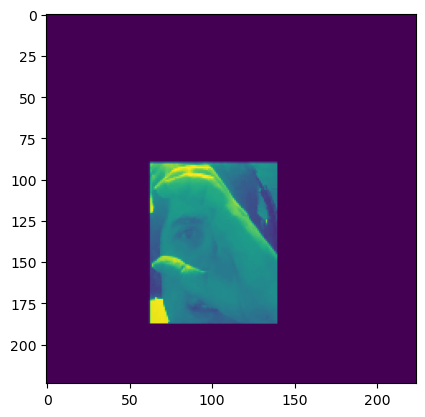

In [17]:
plt.imshow(frames[0][4])

In [99]:
frames[0]nameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDatasetnameDataset

array([[[[0.71064426],
         [0.71372549],
         [0.71764706],
         ...,
         [0.75294118],
         [0.76078431],
         [0.76078431]],

        [[0.71064426],
         [0.71372549],
         [0.71372549],
         ...,
         [0.75294118],
         [0.76078431],
         [0.76078431]],

        [[0.71064426],
         [0.71372549],
         [0.71197479],
         ...,
         [0.75294118],
         [0.76078431],
         [0.76078431]],

        ...,

        [[0.59607843],
         [0.59215686],
         [0.59215686],
         ...,
         [0.6745098 ],
         [0.6745098 ],
         [0.6745098 ]],

        [[0.59215686],
         [0.59215686],
         [0.59215686],
         ...,
         [0.67058824],
         [0.6745098 ],
         [0.6722685 ]],

        [[0.58788536],
         [0.59215686],
         [0.59215686],
         ...,
         [0.67058824],
         [0.6745098 ],
         [0.67534993]]],


       [[[0.71064426],
         [0.71372549],
         [0.71